In [4]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data = data.dropna()

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

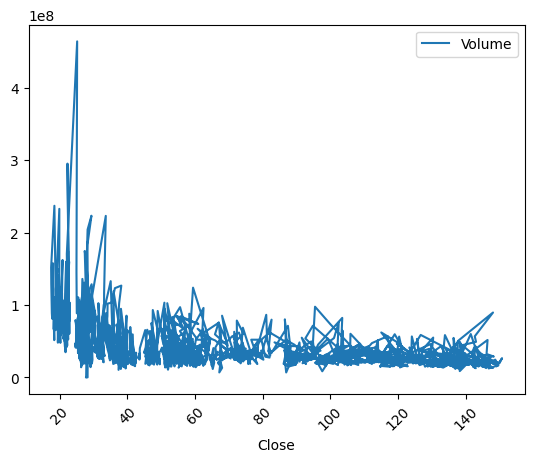

In [25]:
# show data visually

data.plot(x="Close",y="Volume")
plt.xticks(rotation=45)


In [22]:
model = RandomForestRegressor()

In [26]:
# train model
X = data[['Open', 'High', 'Low', 'Volume']]
X =X[:int(len(data)-1)]
y = data['Close']
y = y[:int(len(data)-1)]
model.fit(X,y)


RandomForestRegressor()

In [27]:
# test the model
predictions = model.predict(X)
print('the model score is:', model.score(X,y))

the model score is: 0.9999629737424688


In [28]:
#make the prediction
new_data = data[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('the model predicts the last row or day to be:', prediction)
print('Actual value is:' , data[['Close']].tail(1).values[0][0])

the model predicts the last row or day to be: [139.94594604]
Actual value is: 139.66000366210938


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [38]:
y_pred = regressor.predict(X_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12228\3514715437.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\Dell\AppData\Local\Temp\ipykernel_12228\3514715437.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

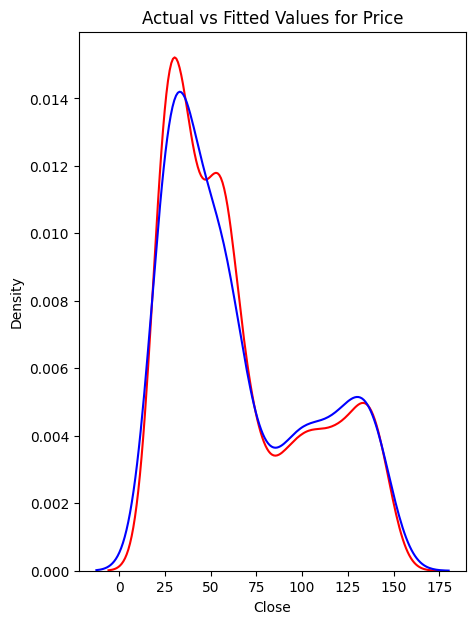

In [41]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [7]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate sample data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse:", mse * 100)

print("mae:", r2 * 100)


Accuracy: 705550.7694741972
f1 score: 81.77280934589837


In [8]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_score, recall_score

# Binarize the target variable
threshold = 0.5
binarizer = Binarizer(threshold=threshold)
y_test_binary = binarizer.fit_transform(y_test.reshape(-1, 1))
y_pred_binary = binarizer.transform(y_pred.reshape(-1, 1))

# Calculate precision and recall
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)

print("Precision:", precision * 100)
print("Recall:", recall * 100)

Precision: 90.0
Recall: 88.23529411764706


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy * 100)
print("F1 Score:", f1 * 100)

Accuracy: 90.0
F1 Score: 90.19607843137256
